# **Bitcoin Sentiment vs Trader Performance**

In [234]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING LIBRARIES AND DATASETS

In [235]:
import pandas as pd

#IMPORTING DATASETS FROM DRIVE
fear_greed_df = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
historical_df = pd.read_csv('/content/drive/MyDrive/historical_data.csv')



In [236]:
#Bitcoin Market Sentiment (Fear & Greed Index)
print(fear_greed_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [237]:
#Historical Trader Data (from Hyperliquid Exchange)
print(historical_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

DATASETS DESCRIPTION

In [238]:
# Shape of datasets
print("Fear & Greed Dataset Shape:", fear_greed_df.shape)
print("Historical Trader Dataset Shape:", historical_df.shape)

Fear & Greed Dataset Shape: (2644, 4)
Historical Trader Dataset Shape: (211224, 16)


In [239]:
# Data types
print("******************************")
print("Fear & Greed Dataset")
print("******************************")
print(fear_greed_df.dtypes)
print("******************************")
print("Historical Trader Dataset")
print("******************************")
print(historical_df.dtypes)


******************************
Fear & Greed Dataset
******************************
timestamp          int64
value              int64
classification    object
date              object
dtype: object
******************************
Historical Trader Dataset
******************************
Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [240]:
# Column names
print("**********************************************************************")
print("Fear & Greed Dataset")
print("**********************************************************************")
print(fear_greed_df.columns)
print("**********************************************************************")
print("Historical Trader Dataset")
print("**********************************************************************")
print(historical_df.columns)

**********************************************************************
Fear & Greed Dataset
**********************************************************************
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
**********************************************************************
Historical Trader Dataset
**********************************************************************
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [241]:
# Null values
print("*********************************")
print("Fear & Greed Dataset")
print("*********************************")
print(fear_greed_df.isnull().sum())
print("*********************************")
print("Historical Trader Dataset")
print("*********************************")
print(historical_df.isnull().sum())

*********************************
Fear & Greed Dataset
*********************************
timestamp         0
value             0
classification    0
date              0
dtype: int64
*********************************
Historical Trader Dataset
*********************************
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [242]:
# Descriptive statistics
print("*********************************")
print("Fear & Greed Dataset")
print("*********************************")
fear_greed_df.describe()
print("*********************************")
print("Historical Trader Dataset")
print("*********************************")
historical_df.describe()

*********************************
Fear & Greed Dataset
*********************************
*********************************
Historical Trader Dataset
*********************************


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


DATA CLEANING

In [243]:
# Convert date column
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

In [244]:
#converted data to datatime datatype
print(fear_greed_df.dtypes)

timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object


In [245]:
# Check for missing values in each column
missing_values_fear_greed= fear_greed_df.isnull().sum()
missing_values_historical = historical_df.isnull().sum()
print(missing_values_fear_greed)
print(missing_values_historical)

timestamp         0
value             0
classification    0
date              0
dtype: int64
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


EXPLORATORY DATA ANALYSIS

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

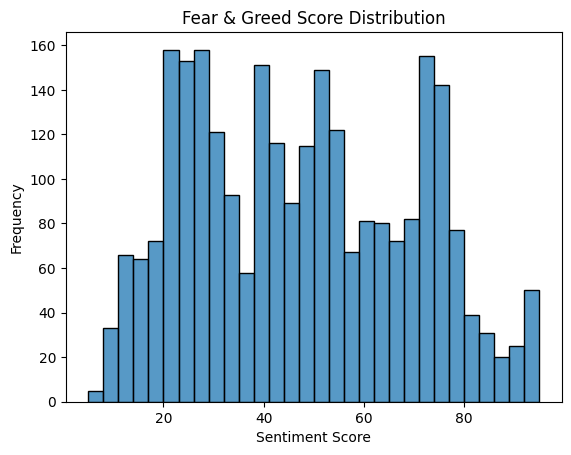

In [247]:
# Distribution of sentiment
sns.histplot(fear_greed_df['value'], bins=30)
plt.title('Fear & Greed Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

The distribution shows that sentiment scores are spread across the entire range, with noticeable peaks around 20–30 (fear) and 70–80 (greed), indicating frequent swings in market sentiment.

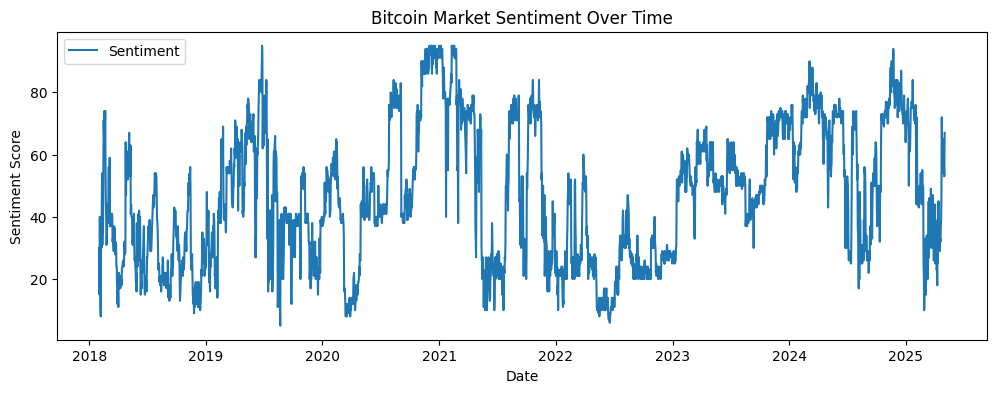

In [248]:
# Time series of Fear & Greed
plt.figure(figsize=(12, 4))
plt.plot(fear_greed_df['date'], fear_greed_df['value'], label='Sentiment')
plt.title('Bitcoin Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

The time series reveals that Bitcoin market sentiment fluctuates cyclically, reflecting repeated phases of fear and greed throughout the years.

DATA MERGING

This project utilizes two distinct datasets:

**Bitcoin Market Sentiment Dataset (Fear & Greed Index):**

One entry per day.

Contains the market sentiment score and label (e.g., Fear, Greed).

**Historical Trader Dataset (Hyperliquid):**

Multiple entries per day, representing individual trades.

Includes details like execution price, trade size, side, closed PnL, timestamp, etc.

***To combine both datasets meaningfully, we performed a many-to-one merge based on the date:***


*   *Each trade record from the historical trader dataset was tagged with the corresponding sentiment score and label from the Fear & Greed Index for that day.*
*   *This means multiple trade records share the same sentiment score, as they occurred on the same date.*


In [249]:
# Convert 'Timestamp IST' to datetime and extract only the date part
historical_df['date'] = pd.to_datetime(historical_df['Timestamp IST'], dayfirst=True).dt.date


In [250]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date


In [251]:
#Datas are merged on basis of date
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['date', 'value', 'classification']],
    on='date',
    how='left'  )

In [252]:
print(merged_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

# **INSIGHTS**

**Insight 1: Does Market Sentiment Affect Trader Profitability?**

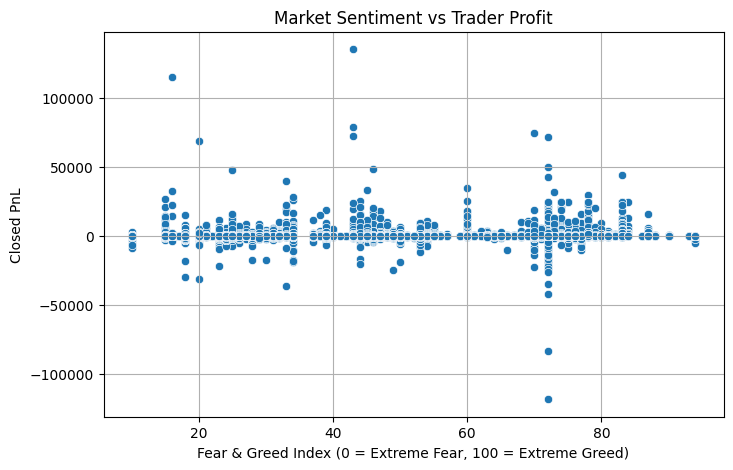

In [253]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL')
plt.title('Market Sentiment vs Trader Profit')
plt.xlabel('Fear & Greed Index (0 = Extreme Fear, 100 = Extreme Greed)')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.show()



*The scatter plot shows that trader profitability (Closed PnL) does not have a strong linear correlation with market sentiment (Fear & Greed Index), but extreme sentiment levels—both fear and greed—often coincide with higher volatility and larger profit or loss outcomes. This suggests that while sentiment alone may not predict profit, emotional market extremes present both risk and opportunity for traders.*

**Insight 2: Are Trading Volumes Higher During Fear or Greed?**

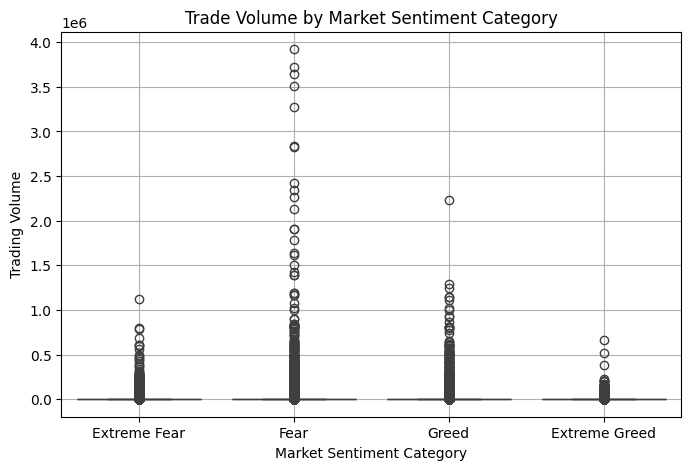

In [254]:
# Creating sentiment categories
merged_df['sentiment_category'] = pd.cut(merged_df['value'],
                                          bins=[0, 25, 50, 75, 100],
                                          labels=['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed'])

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='sentiment_category', y='Size USD')
plt.title('Trade Volume by Market Sentiment Category')
plt.xlabel('Market Sentiment Category')
plt.ylabel('Trading Volume')
plt.grid(True)
plt.show()


*The box plot shows that trading volume tends to be highest during 'Fear' conditions, with more extreme outliers and wider volume distribution compared to other sentiment categories. This suggests that market participants may become more active during moderate fear, potentially due to uncertainty or perceived buying opportunities.*

**Insight 3: How Does Sentiment Affect Number of Traders?**

<ipython-input-255-703552667ea1>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_traders_by_sentiment = merged_sentiment_traders.groupby('sentiment_bin')['num_traders'].mean().reset_index()


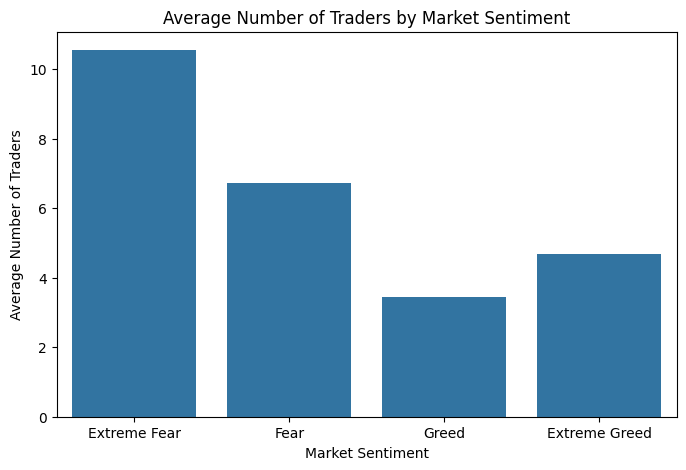

In [255]:
#Creating sentiment bins for easier grouping
bins = [0, 25, 50, 75, 100]
labels = ['Extreme Fear', 'Fear', 'Greed', 'Extreme Greed']
merged_df['sentiment_bin'] = pd.cut(merged_df['value'], bins=bins, labels=labels, include_lowest=True)

#Counting unique traders per date
unique_traders_per_date = merged_df.groupby('date')['Account'].nunique().reset_index()
unique_traders_per_date.rename(columns={'Account': 'num_traders'}, inplace=True)

#Merging unique trader counts back with sentiment data by date
merged_sentiment_traders = pd.merge(unique_traders_per_date,
                                    merged_df[['date', 'value', 'sentiment_bin']].drop_duplicates(),
                                    on='date', how='left')

#Group by sentiment bins to get average number of traders per sentiment category
avg_traders_by_sentiment = merged_sentiment_traders.groupby('sentiment_bin')['num_traders'].mean().reset_index()

#Bar praph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=avg_traders_by_sentiment, x='sentiment_bin', y='num_traders')
plt.title('Average Number of Traders by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Number of Traders')
plt.show()



*The bar plot reveals that the average number of active traders is highest during "Extreme Fear" and steadily decreases as market sentiment shifts toward "Greed" and "Extreme Greed". This indicates that traders are more likely to participate during uncertain or fear-driven conditions, possibly due to panic or perceived opportunities.*

**Insight 4: Do Trading Profits/Loss Fluctuate on Different Days of the Week?**

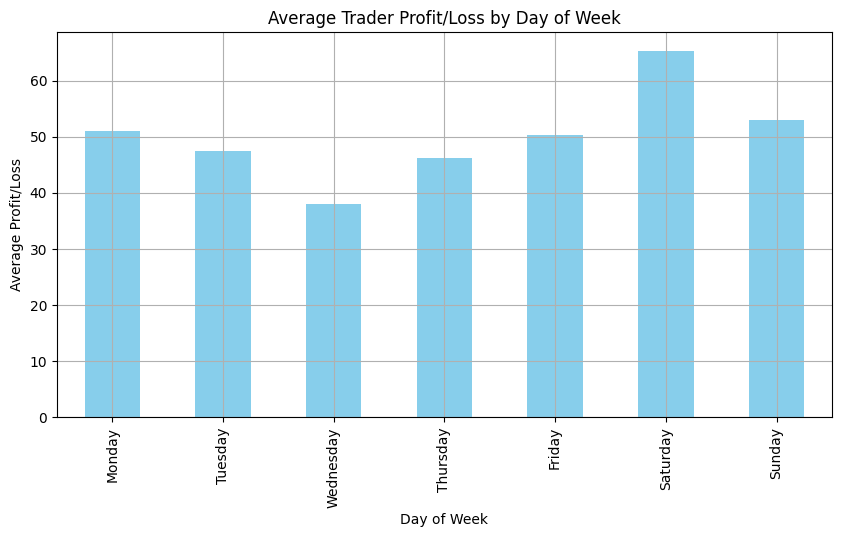

In [256]:
# Add weekday column
merged_df['day_of_week'] = pd.to_datetime(merged_df['date']).dt.day_name()

#finding average profit per day
profit_by_day = merged_df.groupby('day_of_week')['Closed PnL'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar Graph
plt.figure(figsize=(10, 5))
profit_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Trader Profit/Loss by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Profit/Loss')
plt.grid(True)
plt.show()


*The bar chart reveals that trader profitability varies by day, with Saturdays yielding the highest average profits and Wednesdays being the least profitable. This pattern suggests that weekend trading may offer unique opportunities, while mid-week may present challenges that impact performance.*